## Final Project Submission

* Student name: Mia Iseman & Sherry Yang
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Our goal: Predict the sale price of houses in King County, WA for HomeAway, an Airbnb and VRBO competitor who was recently acquired by Expedia located in Bellvue, WA. 


### Why does HomeAway want to predict the house prices in King County? 

* HomeAway wants to know how much employees will be paying for their homes if they create a King County Office as well as possibilities of taxes increasing.
* HomeAway is interested in purchasing homes in the area for special event rentals and executive suites. 
* Tangential beneficial knowledge: If there is a drop in consumer interest in purchasing homes then HomeAway will lose traffic to the site (beyond the scope of our project)
* HomeAway is interested in any knowledge we can gain from any features within the data set.


### We will predict the sale price of houses in KC using the following steps: 
* Obtain and understand our data 
* Scrub our data 
* Explore our data 
* Model our data - using multivariate linear regression 
* Test our model 
* Report findings 

## Obtain and Understand Our Data 

In [32]:
#import pandas to view and clean data using dataframes
import pandas as pd 
#import numpy to perform calculations on the data easily  
import numpy as np 

#read the file as a dataframe
kc_df = pd.read_csv('kc_house_data.csv')

#### We will be using this key to identify what data is in our data set. These are the descriptions of the columns from our data set.  

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  TARGET
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [33]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [34]:
#We used a few different functions to preview data from each column:
kc_df[kc_df['yr_renovated']==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,...,7,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000


In [35]:
kc_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### We had a few assumptions and questions to ask HomeAway about their data. Findings are below:
* id is a unique identifier per house 
* bathroomsNumber is the number of bathrooms per house 
* waterfront has three values: NaN, 0, and 1. NaN values means it is unknown whether that property has a waterfornt view.
* views has values NaN and whole number values 0-4. We suspected this was the number of times that a property has been seen before it was sold, but it is actually the number of interesting views from the property.   
* condition has whole number values 1-5
* grade has values 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, and 13. Based on the King County glossary, this is the "classification by construction quality which refers to the types of materials used and the quality of workmanship."
* yr_renovated has some NaN values, which implies that property was not never renovated. 

## Scrubbing our data 

From understanding the data, we have two main goals before moving on to modeling the data. 

1. We want to change our objects into floats or integers so we can work with that data. 

2. We want to eliminate the redundancy between zeros and null values for yr_renovated and view. 

In [51]:
#Change the date column objects to be datetime entries.
kc_df.date = pd.to_datetime(kc_df.date, format='%m/%d/%Y')

In [56]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

Now the type of our date Series is datetime(64). Now, we'll investigate sqft_basement:

In [60]:
kc_df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

We assume a 0 value means that there is no basement. A question mark value should be coerced into a null value, since like the other features, null values indicate a lack of knowledge about that property. 

In [74]:
# Some of the values are essentially NA, an empty string -- what should I do
# I have to make a decision of what to turn the empty string into
# question mark gives me my choices, or docstring  
# coerce parces into floats and not int. We want to use a float not int
#pd.to_numeric?
kc_df['sqft_basement'] = pd.to_numeric(kc_df['sqft_basement'], errors='coerce')

In [75]:
kc_df['sqft_basement'].nunique()

303

How interesting that of 21,000+ properties, there are only 303 different basement measurements.

Before we begin to explore the features, we'll remove the target column, price, since that is what we're trying to predict.

In [82]:
kc_features_df = kc_df.drop(['price'], axis=1) 

In [83]:
kc_features_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


We suspect that we will be able to drop id, since we already have our information in a single dataframe. However, we want to make sure that there are no patterns to the id created that may correlate to the price, so we'll drop it later.

Now that we've cleaned up our data, we'll look at how the feature values are distributed.

## Exploring Our Data 

In [84]:
#Remind ourselves what our dataset looks like. 
kc_features_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [85]:
#Find the statistical description of the features.
kc_features_df.describe().head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,3.373200,2.115826,2080.321850,15099.408760,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,0.926299,0.768984,918.106125,41412.636876,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.000000,1.750000,1430.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000


In [88]:
#import necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

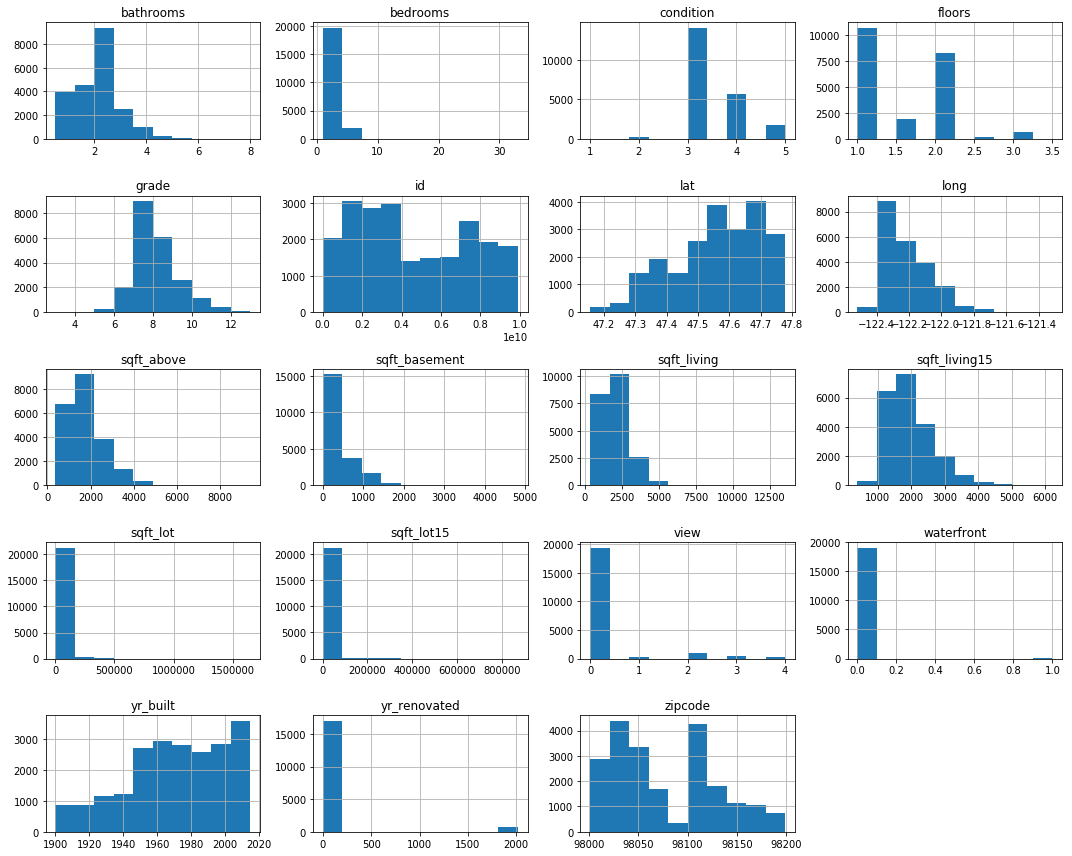

In [103]:
#make histograms of the features to visualize their distributions.
kc_features_df.hist(figsize=(15,12));
plt.tight_layout()

In [40]:
#We want to first look at some information on the dates 
kc_df[['yr_built','yr_renovated','price','date']].head()

,yr_built,yr_renovated,price,date
0,1955,0.0,221900.0,2014-10-13
1,1951,1991.0,538000.0,2014-12-09
2,1933,NaN,180000.0,2015-02-25
3,1965,0.0,604000.0,2014-12-09
4,1987,0.0,510000.0,2015-02-18


In [41]:
#We want to know what are the range of dates in our dataset 
## We find that our dates range from 2014 to 2015 
kc_df['date'] = pd.to_datetime(kc_df.date)
kc_df.sort_values(by='date').head() #earliest dates are from 2014 
kc_df.sort_values(by='date').tail() #latest dates are from 2015 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19381,8149600265,2015-05-14,725000.0,4,1.75,1980,5850,1.0,NaN,1.0,...,8,1380,600.0,1960,0.0,98116,47.5607,-122.391,1810,5850
12623,4166600610,2015-05-14,335000.0,3,2.00,1410,44866,1.0,0.0,0.0,...,7,1410,0.0,1985,0.0,98023,47.3273,-122.370,2950,29152
5632,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0.0,0.0,...,7,1870,0.0,1960,0.0,98007,47.5951,-122.144,1870,7650
13040,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0.0,0.0,...,6,720,670.0,1941,0.0,98115,47.6914,-122.308,920,6380
16580,9106000005,2015-05-27,1310000.0,4,2.25,3750,5000,2.0,0.0,0.0,...,8,2440,1310.0,1924,0.0,98115,47.6747,-122.303,2170,4590


In [42]:
##We want to create a dataframe with just 2015 data, so we need to take it out of datetime 

kc_df = pd.read_csv('kc_house_data.csv')
def newest_data(date):
    return date.endswith('2015')

date_mask = kc_df['date'].apply(newest_data)

#apply the function to the location, column Document Date in the king county dataframe
kc_2015_df = kc_df.loc[date_mask, : ]

#see a sample of results 
kc_2015_df.head()       

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
4,1954400510,2/18/2015,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
7,2008000270,1/15/2015,291850.0,3,1.5,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.0,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.5,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [43]:
##We want to create a dataframe with just 2014 data, so we need to take it out of datetime 

kc_df = pd.read_csv('kc_house_data.csv')
def newest_data(date):
    return date.endswith('2014')

date_mask = kc_df['date'].apply(newest_data)

#apply the function to the location, column Document Date in the king county dataframe
kc_2014_df = kc_df.loc[date_mask, : ]

#see a sample of results 
kc_2014_df.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [44]:
#We want to add a column for PricePerSqFoot 

#kc_df["PricePerSqFt"] = kc_df["price"] / kc_df["sqft_living"]


## Modeling our data 

#### Steps we want to take 
1. Create histograms for all variables in the dataset, are they uniform? 
2. Create a new data set of features that appear more normal than others 
3. Check for linearity assumption for all chosen features with target variable using scatter plots
4. Perform regression 
        * Run a simple OLS regression between independent and dependent variables
        * Plot a regression line on the scatter plots
        * Plot the residuals using sm.graphics.plot_regress_exog().
        * Plot a Q-Q plot for regression residuals normality test
        * Store following values in array for each iteration:
            * Independent Variable
            * r_squared
            * intercept
            * slope
            * p-value
            * normality (JB)

In [45]:
##### [1]Create histograms for all variables in the dataset, are they uniform? 

import matplotlib.pyplot as plt
%matplotlib inline 

#kc_short_df = kc_df[['price','yr_built']]
# n_rows = 1
# n_cols = 2 
# fig,axes = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (15,10))

# headers = kc_short_df.columns 
# counter = 0 
# for i in range(n_rows): 
#     for x in range(n_cols): 
#         ax = axes[i][x]
#         if counter < len(kc_short_df.columns): 
#             ax.hist(kc_short_df[kc_short_df.columns[counter]])
#             ax.set_title(headers[counter])
#         counter += 1
#plt.show()

In [46]:
# import statsmodels.api as sm
# import statsmodels
# from scipy import stats
# from statsmodels.formula.api import ols
# import statsmodels.formula.api as smf
# plt.style.use('seaborn')

# results = dict({'crim':{},'dis':{},'rm':{},'zn':{},'age':{}})
# headers = ['crim','dis','rm','zn','age','medv']

# for header in headers:
#     if header == 'medv':
#         pass 
#     else: 
#         graph_df = slice_df[[header,'medv']]
#         f = f'medv~{header}'
#         model = ols(formula=f,data=graph_df).fit()
#         print(model.summary())
        
#         results[header]["r_squared"]= model.rsquared 
#         results[header]['p-value']= model.pvalues[1]
#         results[header]['normality (JB)'] = stats.jarque_bera(graph_df)
        
#         #plot QQ plot

#         fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line = '45', fit = True)
#         fig.show()
        
#         #exog plot 
#         regress_exog = sm.graphics.plot_regress_exog(model,header)

In [47]:
# headers = ['crim','dis','rm','zn','age','medv']

# for header in headers: 
#     if header == 'medv': 
#         pass 
#     else: 
#         graph_df = slice_df[[header,'medv']]
#         m,b = np.polyfit(graph_df['medv'],graph_df[header],1)
#         xs = graph_df['medv']
#         ys = [m*x +b for x in graph_df['medv']]

#         plt.scatter(graph_df['medv'],graph_df[header])
#         plt.plot(xs,ys,color = 'red')
#         plt.title(header)
#         plt.show()
                
#         results[header]["Independent_Variable"]= header 
#         results[header]['slope']= m
#         results[header]['intercept']= b

## Testing our model 
We will be using cross validation to test our model.

## Reporting findings 